In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import scipy
from scipy import optimize
from matplotlib.lines import Line2D

In [2]:
wb = openpyxl.load_workbook('test_data.xlsx')
ws = wb["Tabelle1"]

In [3]:
cal_con = np.asarray([float(ws[a].value) for a in ['A2','A3','A4','A5','A6','A7']])
cal_abs = np.asarray([float(ws[a].value) for a in ['B2','B3','B4','B5','B6','B7']])
NPP_con = np.asarray([float(ws[a].value) for a in ['D2','D3','D4','D5','D6','D7','D8']])
NPP_speed = np.asarray([float(ws[a].value) for a in ['E2','E3','E4','E5','E6','E7','E8']])
KHPO_con = np.asarray([float(ws[a].value) for a in ['H2','H3','H4','H5','H6']])
KHPO_speed = np.asarray([float(ws[a].value) for a in ['I2','I3','I4','I5','I6']])

In [4]:
fitfunc = lambda p, x: p[0]*x + p[1]
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [1, 0]
p1, success = optimize.leastsq(errfunc, p0[:], args = (cal_con, cal_abs))

In [5]:
p1

array([0.01976707, 0.00029782])

In [6]:
y_fit = cal_con*p1[0]+p1[1]
NP_e = p1[0]*(10**6)
NP_ref = 18.3*(10**3)
NP_err = abs(100*(NP_e-NP_ref)/NP_ref)

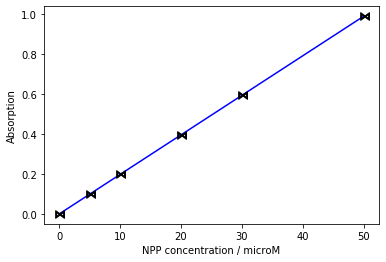

In [7]:
plt.plot(cal_con,y_fit, color = 'blue')
plt.plot(cal_con,y_fit, linestyle = 'None', marker = r'$\bowtie$', color = 'k', markersize = 10)
plt.ylabel("Absorption")
plt.xlabel("NPP concentration / microM")
plt.show()

In [8]:
NPP_speed = NPP_speed/(60*NP_e)*(10**6) # reaction speed in [yM/s]

In [9]:
fitfunc = lambda p, x: (p[0]*x)/(p[1]+x)
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [100, 10]
p1, success = optimize.leastsq(errfunc, p0[:], args = (NPP_con, NPP_speed))
vmax = p1[0]
Km = p1[1]

In [10]:
y_fit = (p1[0]*NPP_con)/(p1[1]+NPP_con)

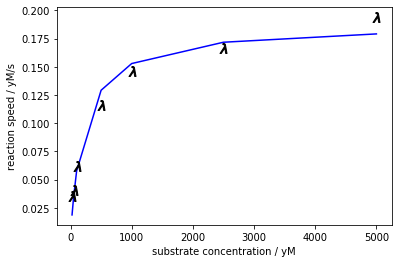

In [11]:
plt.plot(NPP_con,y_fit, color = 'blue')
plt.plot(NPP_con,NPP_speed, linestyle = 'None', marker = r'$\lambda$', color = 'k', markersize = 10)
plt.ylabel("reaction speed / yM/s")
plt.xlabel("substrate concentration / yM")
plt.show()

In [12]:
KHPO_speed = KHPO_speed/(60*NP_e)*(10**6) # reaction speed in [yM/s]

In [13]:
S = 2500
fitfunc = lambda p, x: (vmax*S)/((Km)*(1+(x/p[0]))+S)
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = Km
p1, success = optimize.leastsq(errfunc, p0, args = (KHPO_con, KHPO_speed))
Ki = p1[0]

In [14]:
y_fit = (vmax*S)/(Km*(1+(KHPO_con/p1))+S)

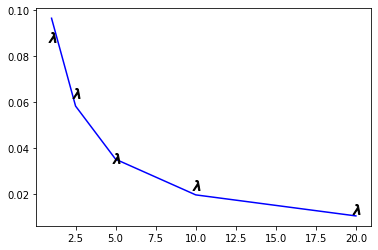

In [15]:
plt.plot(KHPO_con, y_fit, color = 'blue')
plt.plot(KHPO_con, KHPO_speed, linestyle = 'None', marker = r'$\lambda$', color = 'k', markersize = 10)
plt.show()

In [16]:
print("The calculated absorption coefficient is: ", NP_e, "1/(M*cm)")
print("The literature absorption coefficient is: ", NP_ref, "1/(M*cm)")
print("The error is: ", NP_err, "%")

The calculated absorption coefficient is:  19767.070215779837 1/(M*cm)
The literature absorption coefficient is:  18300.0 1/(M*cm)
The error is:  8.016777135408944 %


In [17]:
print("Km is:",Km,"yM")
print("vmax is:",vmax,"yM/s")

Km is: 224.20301094565227 yM
vmax is: 0.18718829681798213 yM/s


In [18]:
print("Ki is:",Ki,"yM")

Ki is: 0.10548813921065045 yM


In [19]:
ezy_wgt = 80000 # enzyme weight in g/mol
ezy_SL = 16.9 # enzyme concentration in mg/ml von Stammlösung
ezy_con = ezy_SL/(ezy_wgt) # enzyme concentration in M
ezy_con = ezy_con*5/(60*500)*(10**6) # enzyme concentration in Messkuvette
print("The enzyme concentration is ", ezy_con, " yM")

The enzyme concentration is  0.03520833333333333  yM


In [20]:
A_m = vmax/ezy_con # Wechslezahl in 1/s
A_s = A_m/ezy_wgt
A_s = A_s*(60000) # A_s in U/mg
print("The molar activity is:",A_m," 1/s")
print("The spezific activity is:",A_s," U/mg")

The molar activity is: 5.316590678853931  1/s
The spezific activity is: 3.9874430091404487  U/mg


In [21]:
vmax/60

0.003119804946966369

In [22]:
A_s/60000

6.645738348567414e-05

In [23]:
2*17.77/(1000*80000*3)

1.4808333333333333e-07

In [24]:
ezy_con

0.03520833333333333

In [25]:
7.8/100000

7.8e-05